<a href="https://colab.research.google.com/github/mramhyd/TimeSeriesProject1/blob/master/TimeSeriesProject%231.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# load pandas
import pandas as pd
data_url = '/content/service-data-engineoil.xlsx'
# read data from url as pandas dataframe
df = pd.read_excel(data_url)
df.head()

,Invoice Date,Job Card Date,Business Partner Name,Vehicle No.,Vehicle Model,Current KM Reading,INVOICE LINE TEXT
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL


In [0]:
df.rename(columns={'Job Card Date':'job-card-date', 'INVOICE LINE TEXT':'spare-parts'}, inplace=True)
df.head()

,Invoice Date,job-card-date,Business Partner Name,Vehicle No.,Vehicle Model,Current KM Reading,spare-parts
0,2017-05-30,2017-05-30,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL
1,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL
2,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH
3,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES
4,2017-06-02,2017-05-31,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL


In [0]:
engine_oil = df['spare-parts']=='ENGINE OIL'
# print(engine_oil.head())
newdf = df[engine_oil]
engoil_df = newdf.to_csv('/content/engine-oil-df.xlsx')
print(newdf.shape)

(3802, 1)


In [0]:
# load pandas
import pandas as pd
data_url = '/content/engine-oil-df.csv'
# read data from url as pandas dataframe
df = pd.read_csv(data_url)
df.head()

,job-card-date,spare-parts
0,2017-05-30,ENGINE OIL
1,2017-05-31,ENGINE OIL
2,2017-05-31,ENGINE OIL
3,2017-05-31,ENGINE OIL
4,2017-05-31,ENGINE OIL


In [0]:
df1 = df.count()
df1.head()

,spare_parts
job-card-date,
2017-05-30,1
2017-05-31,6
2017-06-01,8
2017-06-02,4
2017-06-03,6


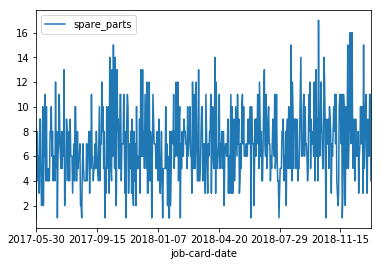

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
df1.plot()
plt.rcParams["figure.figsize"] = (40,20)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.spare_parts   No. Observations:                  550
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1410.076
Method:                       css-mle   S.D. of innovations              3.139
Date:                Wed, 11 Sep 2019   AIC                           2834.151
Time:                        12:05:04   BIC                           2864.321
Sample:                             1   HQIC                          2845.941
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0059      0.036      0.163      0.871      -0.065       0.077
ar.L1.D.spare_parts    -0.9150      0.042    -21.722      0.000      -0.998      -0.832
ar.L2.D.spare_pa

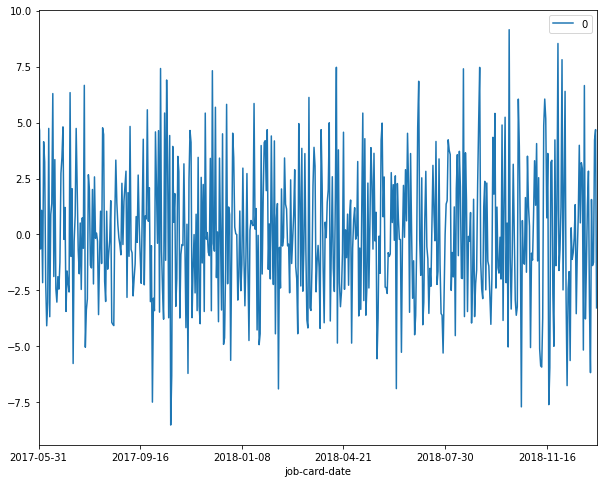

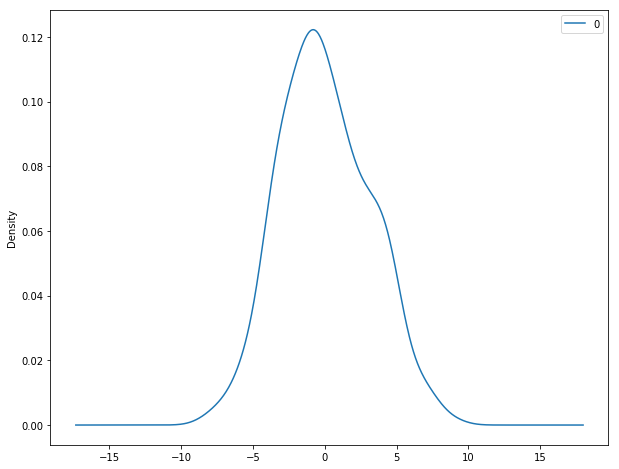

                0
count  550.000000
mean     0.013021
std      3.146485
min     -8.513801
25%     -2.292709
50%     -0.261005
75%      2.232553
max      9.149942


In [0]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame

#fit model
model = ARIMA(df1, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

#plot residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.rcParams["figure.figsize"] = (5,5)
plt.show()
print(residuals.describe())

Test MSE: 11.888


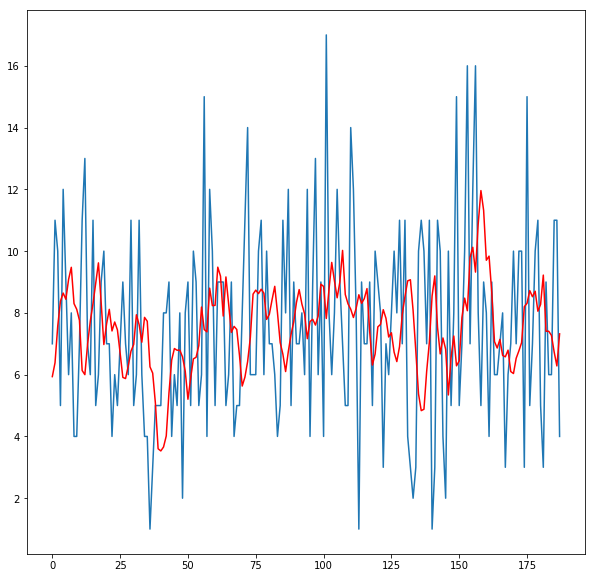

In [0]:
from sklearn.metrics import mean_squared_error

X = df1.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
    
# 	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
plt.rcParams["figure.figsize"] = (10,25)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()